In [ ]:
# Loading Data

In [6]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno
datapro=pd.read_csv('hotel_bookings.csv',header=0)
hd=pd.DataFrame(datapro)
pd.set_option('display.max_columns', None)
datapro



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# Clearing Data

In [4]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
hd.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [56]:
hd = hd.dropna(subset=['company','agent','country'],axis=0)
hd

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,1,No Deposit,240.0,113.0,0,Transient,82.0,1,1,Check-Out,2015-10-13
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,0.0,0,BB,AUT,Corporate,Corporate,0,0,0,E,G,2,No Deposit,185.0,281.0,0,Transient-Party,52.2,0,0,Check-Out,2015-11-17
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,0.0,0,BB,ESP,Corporate,Corporate,0,0,0,A,A,1,No Deposit,334.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-06
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,2,No Deposit,328.0,281.0,0,Transient-Party,40.0,0,0,Check-Out,2015-11-15
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,0.0,0,BB,ITA,Corporate,Corporate,0,0,0,A,A,2,No Deposit,326.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,City Hotel,0,13,2017,May,21,24,0,1,2,0.0,0,BB,CHN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,478.0,0,Transient-Party,150.0,0,1,Check-Out,2017-05-25
113046,City Hotel,0,13,2017,May,22,29,1,3,1,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,290.0,148.0,0,Transient,95.0,0,0,Check-Out,2017-06-02
113082,City Hotel,0,13,2017,May,22,29,1,3,2,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,290.0,148.0,0,Transient,110.0,0,0,Check-Out,2017-06-02
113627,City Hotel,0,210,2017,June,23,9,0,1,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,D,D,0,No Deposit,14.0,229.0,0,Transient,135.0,0,0,Check-Out,2017-06-10


In [7]:
hd.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

<Axes: >

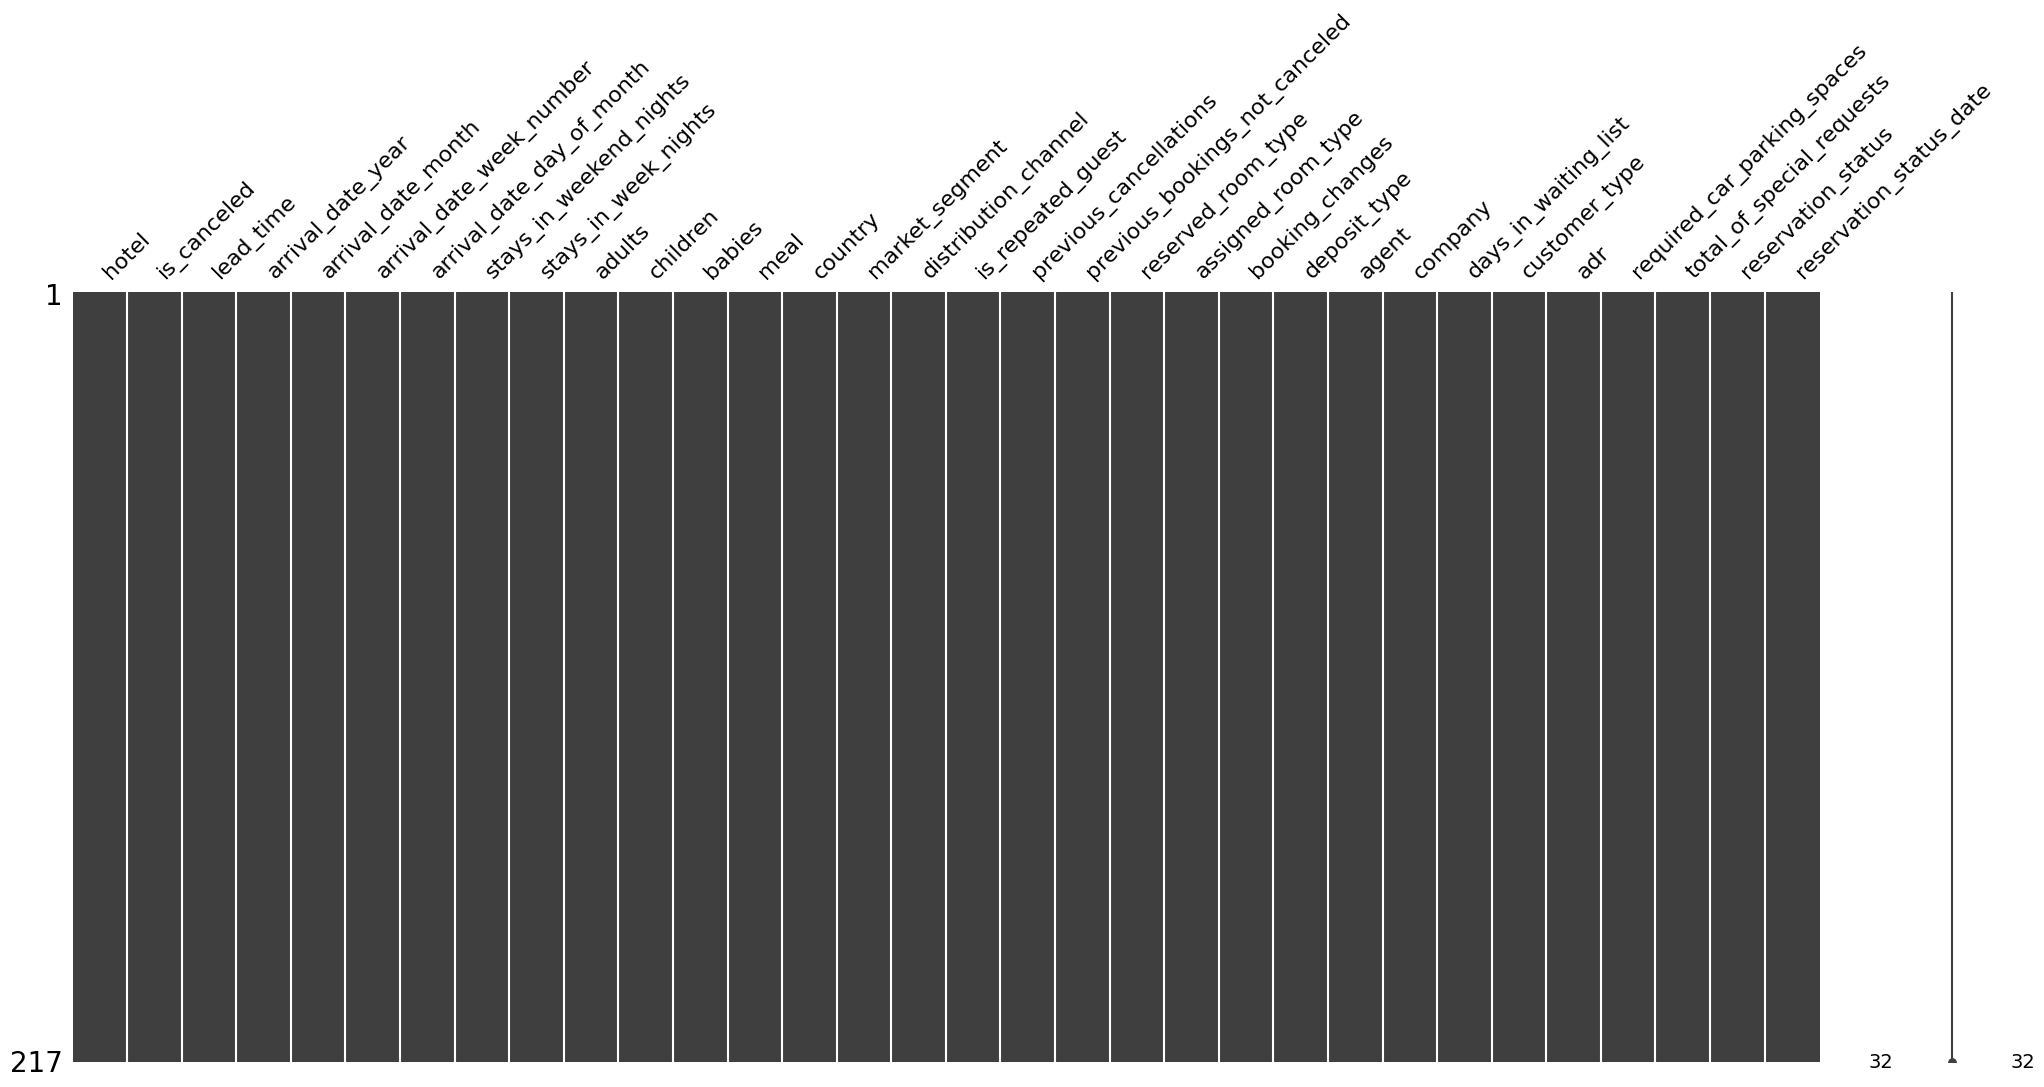

In [49]:
missingno.matrix(hd)

In [70]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 2392 to 116451
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           217 non-null    object 
 1   is_canceled                     217 non-null    int64  
 2   lead_time                       217 non-null    int64  
 3   arrival_date_year               217 non-null    int64  
 4   arrival_date_month              217 non-null    object 
 5   arrival_date_week_number        217 non-null    int64  
 6   arrival_date_day_of_month       217 non-null    int64  
 7   stays_in_weekend_nights         217 non-null    int64  
 8   stays_in_week_nights            217 non-null    int64  
 9   adults                          217 non-null    int64  
 10  children                        217 non-null    float64
 11  babies                          217 non-null    int64  
 12  meal                            217

In [72]:
hd.arrival_date_year.describe()

count     217.000000
mean     2015.465438
std         0.720053
min      2015.000000
25%      2015.000000
50%      2015.000000
75%      2016.000000
max      2017.000000
Name: arrival_date_year, dtype: float64

In [71]:
hd.arrival_date_week_number.describe()

count    217.000000
mean      38.198157
std       12.890292
min        1.000000
25%       33.000000
50%       45.000000
75%       46.000000
max       53.000000
Name: arrival_date_week_number, dtype: float64

In [73]:
hd.lead_time .describe()

count    217.000000
mean      40.520737
std       61.748375
min        0.000000
25%       12.000000
50%       27.000000
75%       36.000000
max      364.000000
Name: lead_time, dtype: float64

In [ ]:
# Analytics

In [ ]:
## Descriptive statistics

In [74]:
hd.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.00000,217.000000,217.000000,217.000000,217.0,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0,217.000000,217.000000,217.000000
mean,0.078341,40.520737,2015.465438,38.198157,10.824885,1.56682,4.631336,1.410138,0.036866,0.0,0.069124,0.009217,0.147465,1.285714,202.617512,262.105991,0.0,63.793733,0.092166,0.198157
std,0.269329,61.748375,0.720053,12.890292,7.582065,1.49270,3.552846,0.520406,0.232788,0.0,0.254252,0.135769,0.717768,1.251454,111.487444,103.602708,0.0,38.823568,0.289929,0.546365
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,5.000000,9.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2015.000000,33.000000,6.000000,0.00000,2.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,185.000000,281.000000,0.0,40.000000,0.000000,0.000000
50%,0.000000,27.000000,2015.000000,45.000000,9.000000,2.00000,4.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,185.000000,281.000000,0.0,48.000000,0.000000,0.000000
75%,0.000000,36.000000,2016.000000,46.000000,13.000000,2.00000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,324.000000,281.000000,0.0,85.000000,0.000000,0.000000
max,1.000000,364.000000,2017.000000,53.000000,31.000000,9.00000,21.000000,3.000000,2.000000,0.0,1.000000,2.000000,7.000000,6.000000,444.000000,499.000000,0.0,246.000000,1.000000,3.000000


In [75]:
hd.is_canceled.mean()

np.float64(0.07834101382488479)

In [76]:
hd.required_car_parking_spaces.mean()

np.float64(0.09216589861751152)

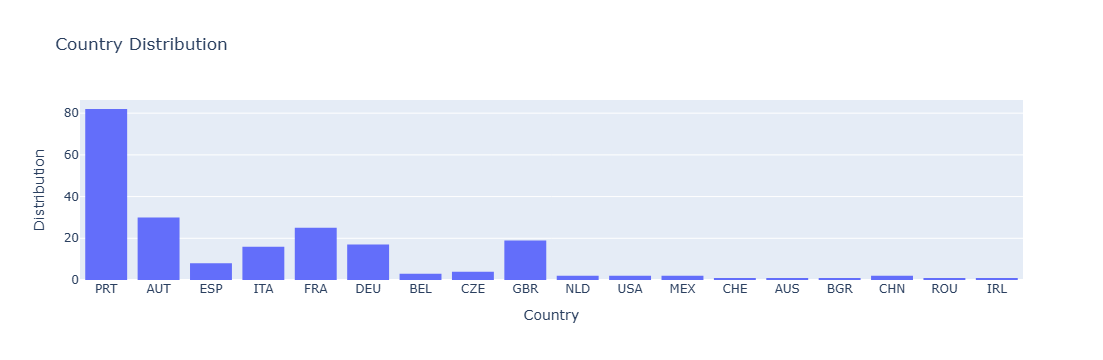

In [68]:
import plotly.express as px
fig = px.histogram(hd, x="country",nbins=30,title='Country Distribution')
fig.update_layout(xaxis_title='Country',yaxis_title='Distribution')
fig.show()


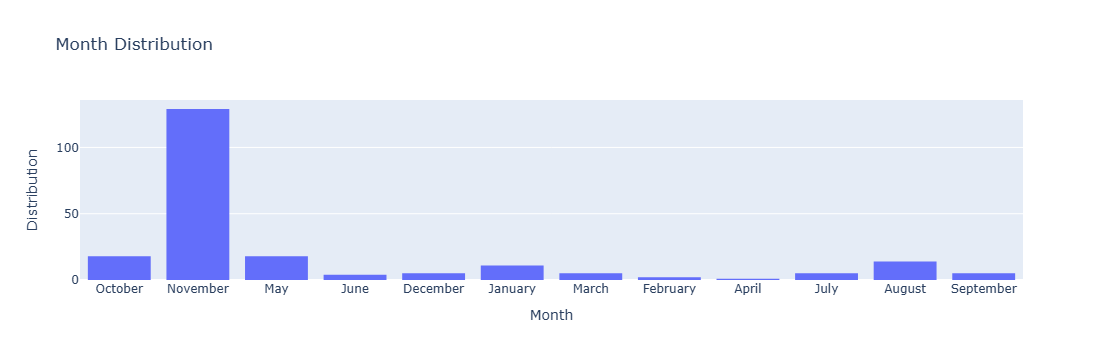

In [67]:
import plotly.express as px
fig = px.histogram(hd, x="arrival_date_month",nbins=30,title='Month Distribution')
fig.update_layout(xaxis_title='Month',yaxis_title='Distribution')
fig.show()

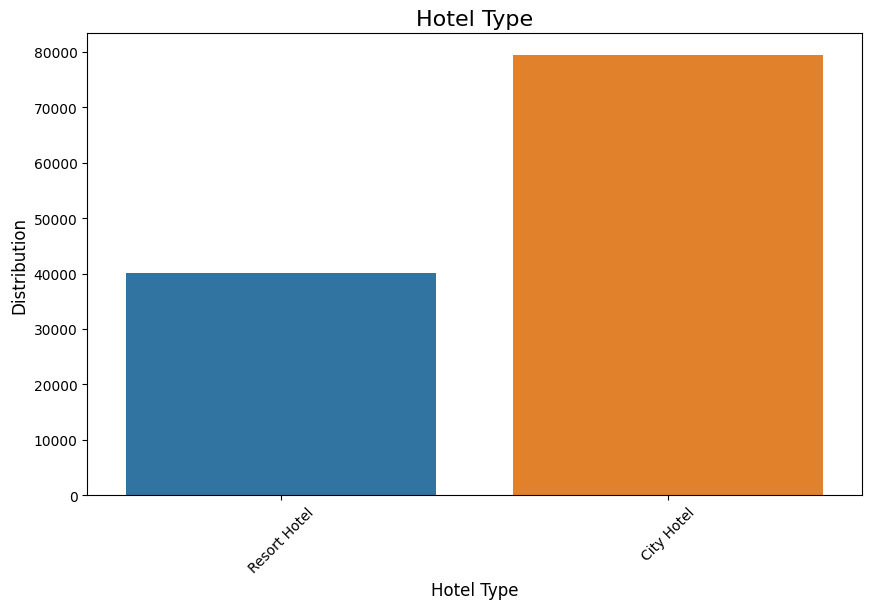

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hotel', data=hd,hue='hotel')
plt.title('Hotel Type', fontsize=16)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Distribution', fontsize=12)
plt.xticks(rotation=45)
plt.show()

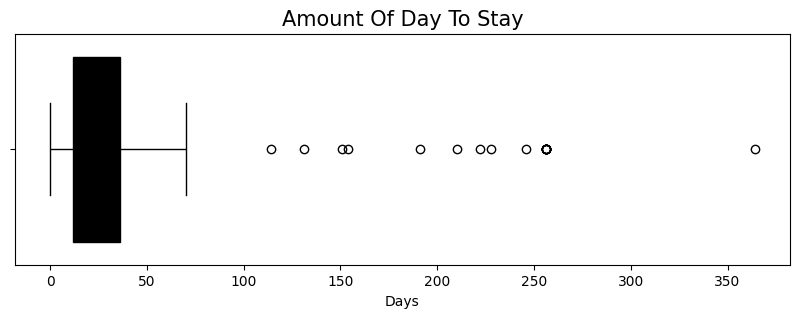

In [89]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=hd['lead_time'], color='black')
plt.title('Amount Of Day To Stay', fontsize=15)
plt.xlabel('Days', fontsize=10)
plt.show()

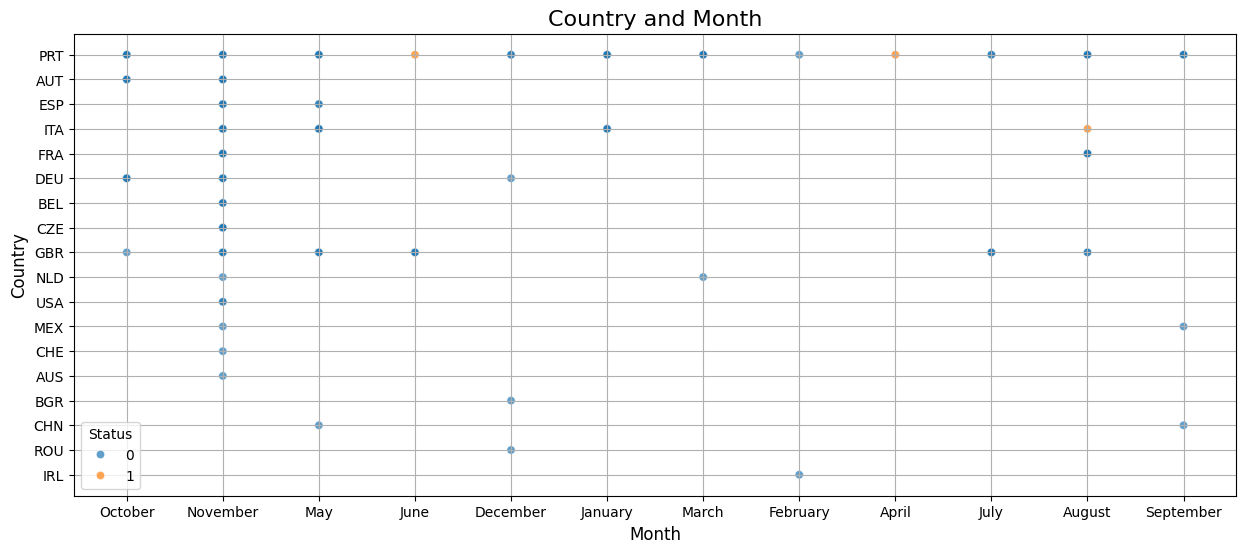

In [94]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=hd, x='arrival_date_month', y='country', hue='is_canceled', alpha=0.7)
plt.title('Country and Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend(title='Status')
plt.grid(alpha=1)
plt.show()

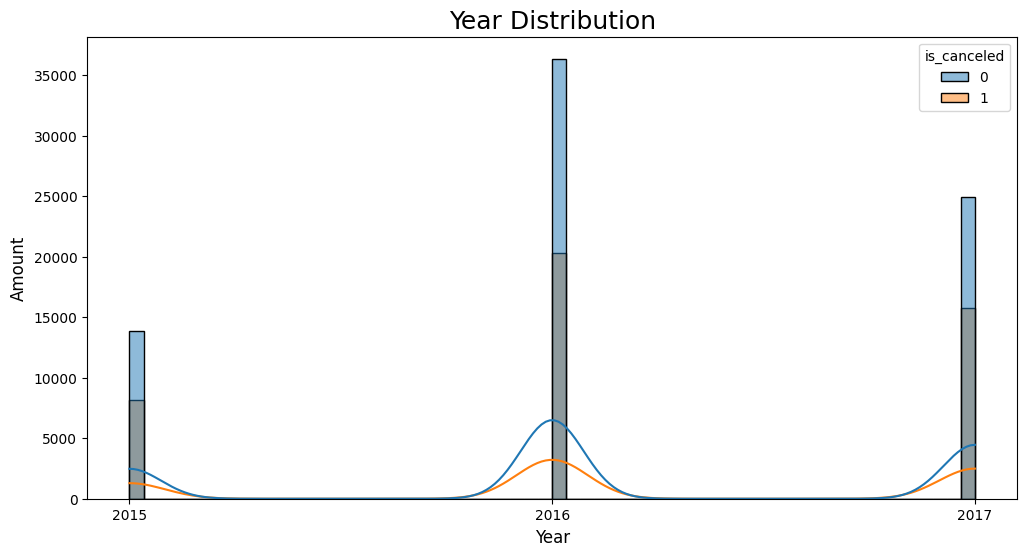

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data=hd, x='arrival_date_year', hue='is_canceled', kde=True, bins=60)
plt.title('Year Distribution', fontsize=18)
plt.xticks([2015,2016,2017])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.show()

In [ ]:
# Hypothesis

In [ ]:
# The best time to go to Europe in Resort Hotel is in summer, while City Hotels are popular in the colder seasons.

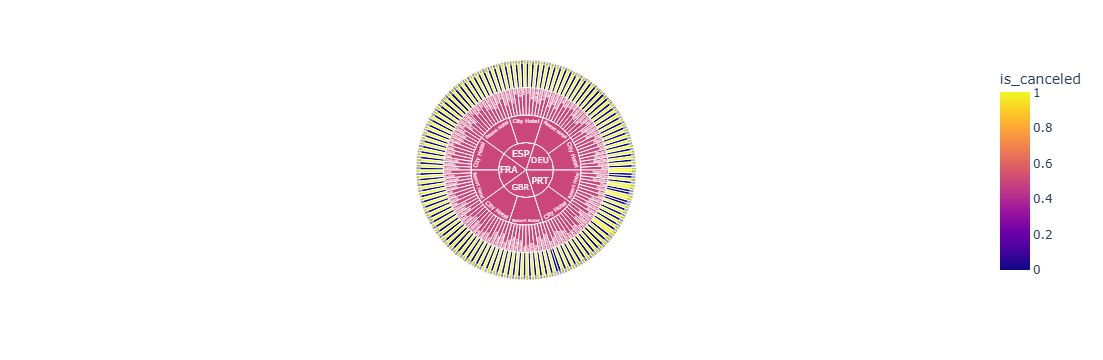

In [21]:
df=hd
countries = pd.DataFrame(df['country'].value_counts().sort_values())
countries['country_name'] = countries.index
countries.reset_index(drop=True, inplace=True)

top_countries = countries['country_name'].loc[countries.shape[0] - 5:].values


agg_hd = df.groupby(['arrival_date_month', 'country', 'hotel', 'is_canceled']).size().reset_index(name='count'); agg_hd
fig = px.sunburst(agg_hd[agg_hd['country'].isin(top_countries)], path=['country', 'hotel', 'arrival_date_month', 'count'], color='is_canceled')
fig.update_layout(hovermode=False)
fig.show()

In [ ]:
#  According to my sunburst chart my hypothesis was not confirmed, as Resort Hotels are in high demand mostly in the summer, but  City hotels remain popular in both warm and cold seasons.
# For example: In France  Resort Hotels are queit popular August, at the same time City Hotels remain in demand both in June and December.